# Loading Data

In [73]:
import pandas as pd

df = pd.read_csv('physicaldataset2.csv')

# Initial number of rows and columns
print(f"Initial dataset shape: {df.shape} (rows, columns)")

Initial dataset shape: (93249, 33) (rows, columns)


# Displays

In [74]:
# Check for the number of missing values in each column
print(df.isnull().sum())


YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               93249
Data_Value_Type                   0
Data_Value                     9235
Data_Value_Alt                 9235
Data_Value_Footnote_Symbol    84014
Data_Value_Footnote           84014
Low_Confidence_Limit           9235
High_Confidence_Limit          9235
Sample_Size                    9235
Total                         89919
Age(years)                    73269
Education                     79929
Gender                        86589
Income                        69939
Race/Ethnicity                66609
GeoLocation                    1736
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

# Cleaning Data

In [75]:
# Remove unnecessary columns
df = df.drop(['Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataValueTypeID', 'QuestionID', 'TopicID', 'ClassID'], axis=1)

# Drop rows where 'GeoLocation' is missing
df = df.dropna(subset=['GeoLocation'])

# Remove rows with missing 'Data_Value'
df = df.dropna(subset=['Data_Value'])

# Remove rows where 'Age(years)', 'Gender', 'Race/Ethnicity', are all missing
df = df.dropna(subset=['Age(years)', 'Gender', 'Race/Ethnicity'], how='all')

# Fill in missing data for 'Age(years)', 'Gender', 'Race/Ethnicity', 'Income' with "Missing Data"
for column in ['Age(years)', 'Gender', 'Race/Ethnicity', 'Income']:
    df[column] = df[column].fillna('Missing Data')

# Check if YearStart and YearEnd are always the same
year_comparison = (df['YearStart'] == df['YearEnd']).all()
if year_comparison:
    # Drop YearEnd if it's always the same as YearStart
    df = df.drop('YearEnd', axis=1)

# Display the shape to see how many rows are left after all clean-up steps
print(df.shape)

# Check the remaining columns after cleanup
print(df.columns.tolist())

# Display the first few rows of the cleaned dataset
print(df.head())

# Print the shape of the DataFrame after cleaning to show the number of rows and columns remaining
print(f"Final dataset shape: {df.shape} (rows, columns)")

print(f"Total number of rows after cleaning: {df.shape[0]}")

(43274, 25)
['YearStart', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']
    YearStart LocationAbbr  LocationDesc  \
5        2015           GU          Guam   
6        2012           WY       Wyoming   
9        2011           AL       Alabama   
11       2015           RI  Rhode Island   
14       2020           DE      Delaware   

                                    Datasource                    Class  \
5   Behavioral Risk Factor Surveillance System        Physical Activity   
6   Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
9   Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
11  Behavioral Ris

In [76]:
# Display unique values for key columns
print("Unique values in 'Age(years)':", df['Age(years)'].unique())
print("Unique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'Race/Ethnicity':", df['Race/Ethnicity'].unique())
print("Unique values in 'Income':", df['Income'].unique())
unique_locations = df['LocationDesc'].unique()
print("Unique locations:", unique_locations)


Unique values in 'Age(years)': ['Missing Data' '25 - 34' '55 - 64' '45 - 54' '35 - 44' '18 - 24'
 '65 or older']
Unique values in 'Gender': ['Missing Data' 'Male' 'Female']
Unique values in 'Race/Ethnicity': ['Hispanic' 'American Indian/Alaska Native' 'Missing Data' 'Asian' 'Other'
 '2 or more races' 'Non-Hispanic White' 'Hawaiian/Pacific Islander'
 'Non-Hispanic Black']
Unique values in 'Income': ['Missing Data']
Unique locations: ['Guam' 'Wyoming' 'Alabama' 'Rhode Island' 'Delaware' 'New Jersey'
 'Puerto Rico' 'Maine' 'Virginia' 'Washington' 'California' 'New York'
 'Massachusetts' 'Arkansas' 'Illinois' 'New Hampshire' 'Maryland' 'Hawaii'
 'Louisiana' 'South Dakota' 'Texas' 'Oklahoma' 'Oregon' 'Kansas' 'Florida'
 'Idaho' 'Virgin Islands' 'Montana' 'District of Columbia' 'Minnesota'
 'Colorado' 'North Carolina' 'North Dakota' 'South Carolina'
 'Pennsylvania' 'Nebraska' 'Michigan' 'Nevada' 'New Mexico' 'Wisconsin'
 'Utah' 'Arizona' 'Mississippi' 'Indiana' 'Georgia' 'Ohio' 'Iowa'
 'Kent

# Sample Visualizations

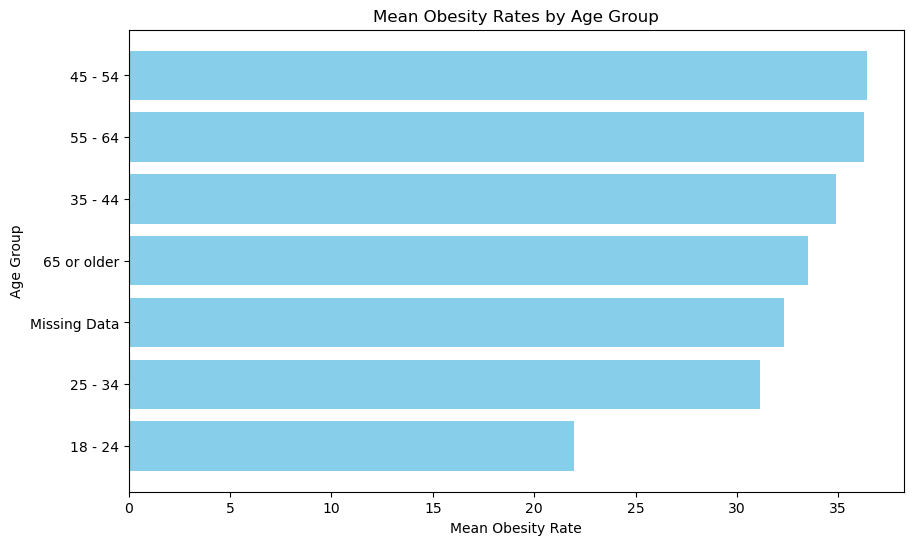

In [77]:
age_group_means = df[df['Class'] == 'Obesity / Weight Status'].groupby('Age(years)')['Data_Value'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(age_group_means['Age(years)'], age_group_means['Data_Value'], color='skyblue')
plt.title('Mean Obesity Rates by Age Group')
plt.xlabel('Mean Obesity Rate')
plt.ylabel('Age Group')
plt.show()


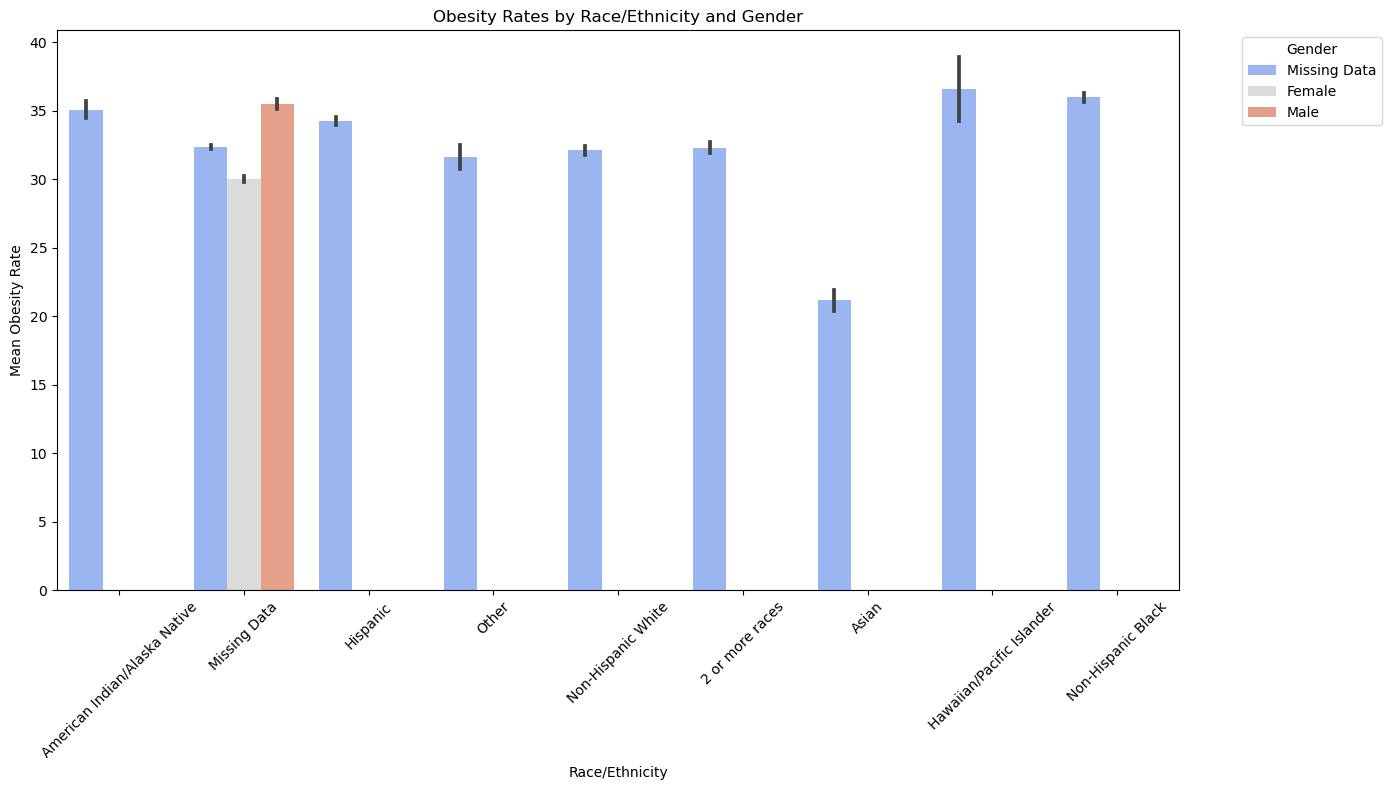

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare across 'Race/Ethnicity' and 'Gender'

# Visualization with seaborn for better handling of multiple categories
plt.figure(figsize=(14, 8))
sns.barplot(data=obesity_data, x='Race/Ethnicity', y='Data_Value', hue='Gender', palette='coolwarm')
plt.title('Obesity Rates by Race/Ethnicity and Gender')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Obesity Rate')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


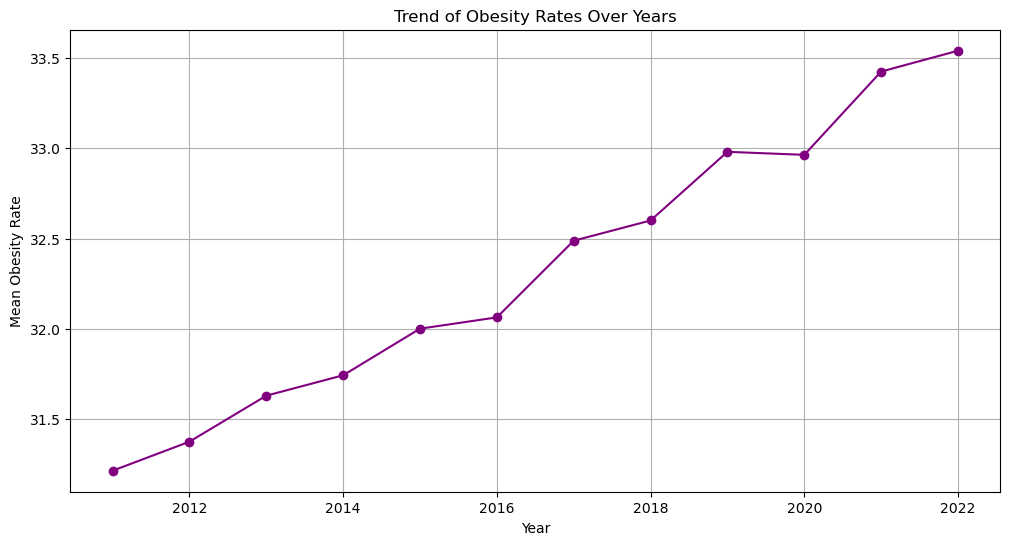

In [79]:
# Trend of obesity rates over the years
yearly_obesity_rates = obesity_data.groupby('YearStart')['Data_Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_obesity_rates['YearStart'], yearly_obesity_rates['Data_Value'], marker='o', linestyle='-', color='purple')
plt.title('Trend of Obesity Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Obesity Rate')
plt.grid(True)
plt.show()


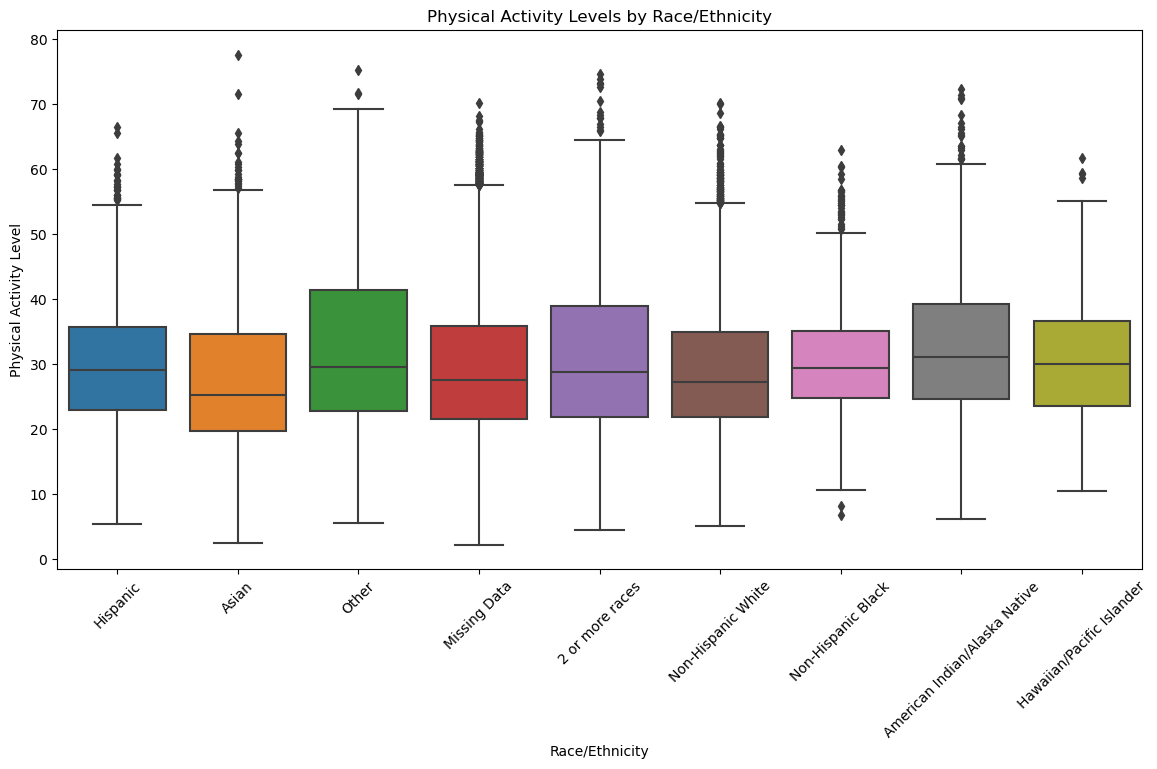

In [80]:
# Filter for physical activity data
physical_activity_data = df[df['Class'] == 'Physical Activity']

# Visualization of physical activity levels by Race/Ethnicity
plt.figure(figsize=(14, 7))
sns.boxplot(data=physical_activity_data, x='Race/Ethnicity', y='Data_Value')
plt.title('Physical Activity Levels by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Physical Activity Level')
plt.xticks(rotation=45)
plt.show()


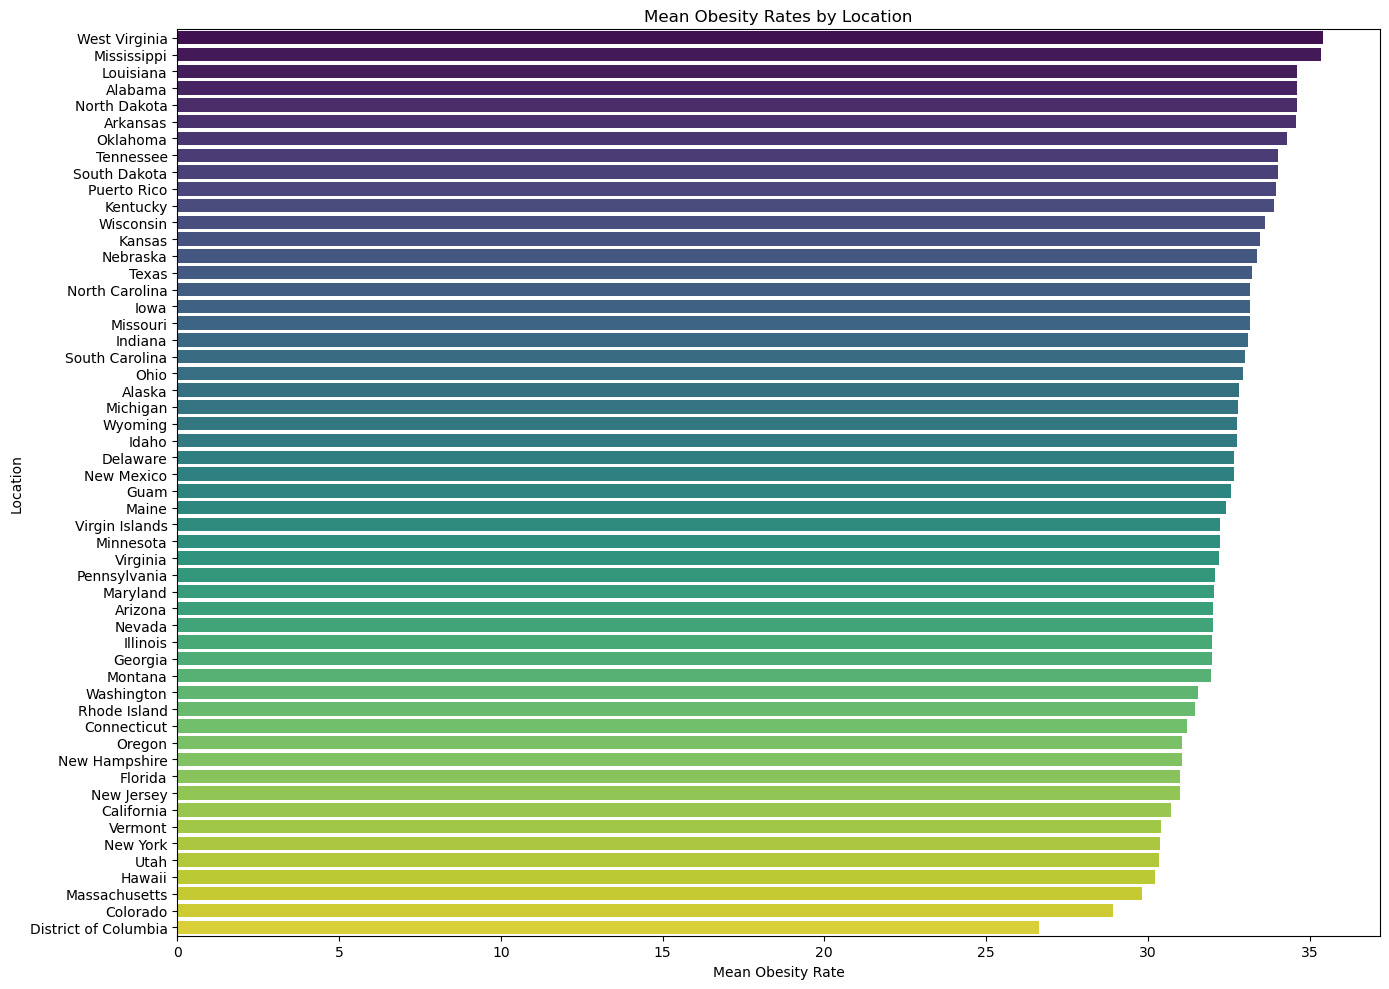

In [81]:
# Filter for obesity data
obesity_data = df[df['Class'] == 'Obesity / Weight Status']

# Calculate mean obesity rates by location
mean_obesity_by_location = obesity_data.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False).reset_index()

# Visualization
plt.figure(figsize=(14, 10))
sns.barplot(data=mean_obesity_by_location, y='LocationDesc', x='Data_Value', palette='viridis')
plt.title('Mean Obesity Rates by Location')
plt.xlabel('Mean Obesity Rate')
plt.ylabel('Location')
plt.tight_layout()
plt.show()
